In [4]:
import aacdata
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# # create dataframes
df_intakes = aacdata.clean_intake_data('data/Austin_Animal_Center_Intakes.csv')
df_outcomes = aacdata.clean_outcome_data('data/Austin_Animal_Center_Outcomes.csv')
df_combined = aacdata.combine_intake_outcome(df_intakes, df_outcomes)
df_combined_deduped = aacdata.remove_duplicate_animals(df_combined)

# #save cleaned data as csv
# df_intakes.to_csv('df_intake.csv')
# df_outcomes.to_csv('df_outcome.csv')
# df_combined.to_csv('df_combined.csv')
# df_combined_deduped.to_csv('df_combined_deduped.csv')

# df_intakes = pd.read_csv('df_intake.csv')
# df_outcomes = pd.read_csv('df_outcome.csv')
# df_combined = pd.read_csv('df_combined.csv')
# df_combined_deduped = pd.read_csv('df_combined_deduped.csv')
# color = ['xkcd:teal', 'xkcd:orange', 'xkcd:yellow','xkcd:light green', 'xkcd:magenta', 'xkcd:light blue']

In [5]:
df_intakes.head()

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Age upon Intake,Breed,Color,Intake Month,Intake Year,Gender,Intake Age in Months
0,A797402,Seven Halo,08/27/2019 07:42:00 PM,4614 Sojourner in Travis (TX),Public Assist,Normal,Dog,4 months,Border Terrier Mix,Tricolor,8,2019,Male,4
1,A803130,Kojack,08/27/2019 07:42:00 PM,4614 Sojourner in Travis (TX),Public Assist,Normal,Dog,2 years,German Shepherd,Black/Blue Tick,8,2019,Male,24
2,A803129,NaN,08/27/2019 06:53:00 PM,7309 Carver Avenue in Austin (TX),Stray,Normal,Dog,4 years,German Shepherd,Black/Tricolor,8,2019,Female,48
3,A803125,NaN,08/27/2019 06:41:00 PM,Brackenridge in Austin (TX),Stray,Normal,Dog,5 years,Great Pyrenees,White,8,2019,Male,60
4,A803126,NaN,08/27/2019 06:32:00 PM,Meander Lane And Webberville in Austin (TX),Stray,Normal,Dog,5 months,Labrador Retriever/Beagle,Black/White,8,2019,Female,5


## What type of animals are brought into the shelter and for what reasons?

In [7]:
# see the count of animals brought into center by animal type
df_intakes['Animal Type'].value_counts()

Dog          60671
Cat          40269
Other         5611
Bird           484
Livestock       15
Name: Animal Type, dtype: int64

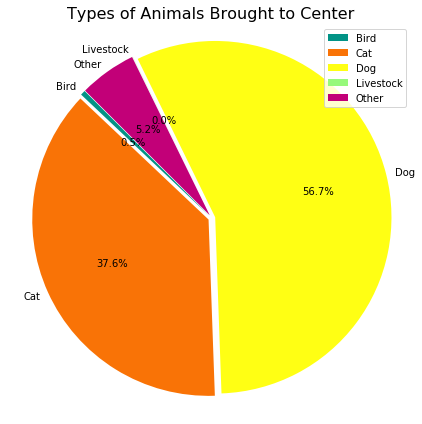

In [6]:
# get value counts for Animal types and sorty by animal type name
animal_types = df_intakes['Animal Type'].value_counts()
animal_types.sort_index(inplace=True)

# create pie chart of animal types
fig = plt.figure(figsize=[6, 6])
ax = fig.add_subplot(111)
explode = len(animal_types) * (.02, )
ax.pie(animal_types.values, labels=animal_types.index, autopct='%1.1f%%', explode=explode,
       labeldistance=1.05, startangle=135, colors=color)
ax.set_title('Types of Animals Brought to Center', fontsize=16);
ax.legend(loc='upper right')
plt.axis('equal')
plt.tight_layout()
plt.savefig('images/intakes_by_animal_type.png')
plt.show()

In [8]:
# see number of animals brought in by intake type
df_intakes.groupby(['Intake Type'])['Animal ID'].count()

Intake Type
Euthanasia Request      255
Owner Surrender       20347
Public Assist          6672
Stray                 75582
Wildlife               4194
Name: Animal ID, dtype: int64

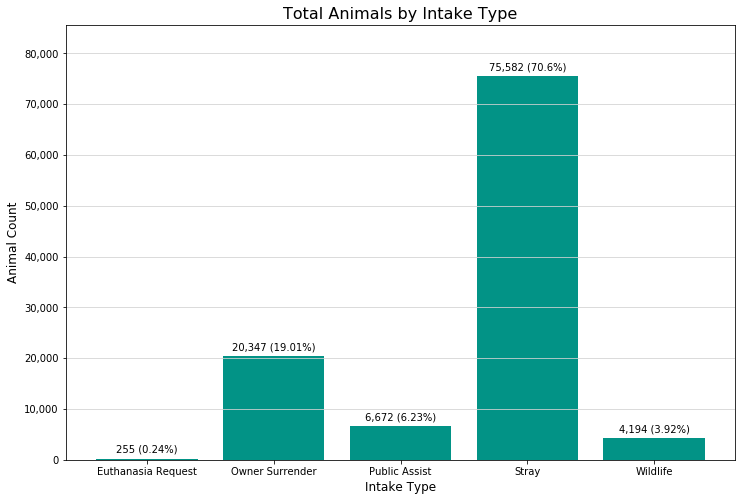

In [14]:
# create bar chart of intake types
intake_types = df_intakes.groupby(['Intake Type'])['Animal ID'].count()

fig, ax = plt.subplots(figsize=(12,8))
x_axis = np.arange(len(intake_types))
# Create a bar chart based upon the above data
plt.bar(x_axis, intake_types, color=color[0])
# can just send in x axis since it has the vlaues of axis already to be updated
plt.xticks(x_axis, intake_types.index)

total_intakes = intake_types.sum()

# annotate chart showing total count and % of all
index = 0
for p in ax.patches:
    h = p.get_height()
    x = p.get_x()+p.get_width()/2.
    pct = ' (' + str(round(h/total_intakes * 100, 2)) + '%)'
    amt = format(p.get_height(), ',.0f')
#     print(amt + pct)
    if h != 0:   
        ax.annotate(amt+pct, xy=(x,h), xytext=(0,4), 
                   textcoords="offset points", ha="center", va="bottom")
    index += 1
        
# reset max y axis so we can get the values printed inside the chart
plt.ylim(0, max(intake_types.values)+10000)
# format y axis with commas
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
# show grid lines on y axis
ax.grid(b=True,which="both",axis="y",linestyle="-",color="lightgrey")

plt.title("Total Animals by Intake Type", fontsize='16')
plt.xlabel("Intake Type", fontsize='12')
plt.ylabel("Animal Count", fontsize='12')
plt.savefig('images/intakes_by_intake_type.png')
plt.show()

## When is an animal most likely to be admitted to the Center?

In [11]:
# look at intake by by Month and Year
df_intakes.groupby(['Intake Month', 'Intake Year'])['Animal ID'].count().unstack()

Intake Year,2013,2014,2015,2016,2017,2018,2019
Intake Month,,,,,,,
1,NaN,1271.0,1198.0,1217.0,1216.0,1123.0,1240.0
2,NaN,1192.0,1119.0,1194.0,1202.0,1044.0,1131.0
3,NaN,1484.0,1346.0,1420.0,1360.0,1324.0,1502.0
4,NaN,1535.0,1543.0,1560.0,1482.0,1388.0,1621.0
5,NaN,1957.0,2094.0,2037.0,1889.0,1745.0,2132.0
6,NaN,1795.0,2189.0,1634.0,1855.0,1722.0,2064.0
7,NaN,1888.0,1635.0,1409.0,1618.0,1666.0,1985.0
8,NaN,1645.0,1718.0,1653.0,1493.0,1399.0,1607.0
9,NaN,1698.0,1591.0,1539.0,1679.0,1621.0,NaN


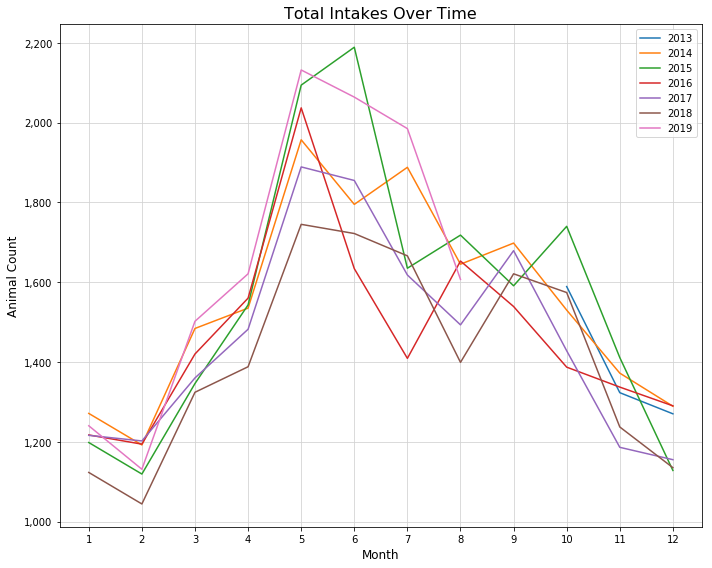

In [12]:
# get intake yearly totals
df_intake_yearly_totals = df_intakes.groupby(['Intake Month', 'Intake Year'])['Animal ID'].count().unstack()

#create bar chart
fig, ax = plt.subplots(figsize=(10,8))
plt.title('Total Intakes Over Time', fontsize='16')
plt.xlabel('Month', fontsize='12')
plt.ylabel('Animal Count', fontsize='12')

plt.grid (b=True,which="both",axis="both",linestyle="-",color="lightgrey")
plt.plot(df_intake_yearly_totals)
plt.xticks(df_intake_yearly_totals.index)
plt.legend(df_intake_yearly_totals.columns)
# format y axis with commas
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
plt.savefig('images/intakes_over_time.png')
plt.tight_layout()
plt.show()

In [13]:
# see how many animals are brought in by condition
df_intakes.groupby(['Intake Condition'])['Animal ID'].count()

Intake Condition
Aged          365
Feral          99
Injured      5295
Normal      94052
Nursing      2886
Other         211
Pregnant       66
Sick         4076
Name: Animal ID, dtype: int64

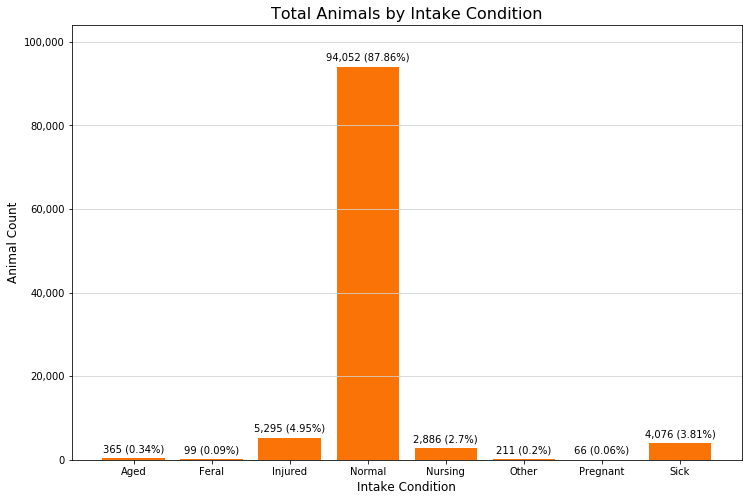

In [16]:
# get intake counts by condition
intake_conditions = df_intakes.groupby(['Intake Condition'])['Animal ID'].count()

# let's plot
fig, ax = plt.subplots(figsize=(12,8))

x_axis = np.arange(len(intake_conditions))
# Create a bar chart based upon the above data
plt.bar(x_axis, intake_conditions, color=color[1])
# can just send in x axis since it has the vlaues of axis already to be updated
plt.xticks(x_axis, intake_conditions.index)

total_intakes = intake_conditions.sum()

index = 0
for p in ax.patches:
    h = p.get_height()
    x = p.get_x()+p.get_width()/2.
    pct = ' (' + str(round(h/total_intakes * 100, 2)) + '%)'
    amt = format(p.get_height(), ',.0f')
#     print(amt + pct)
    if h != 0:   
        ax.annotate(amt+pct, xy=(x,h), xytext=(0,4), 
                   textcoords="offset points", ha="center", va="bottom")
    index += 1
        
# reset max y axis so we can get the values printed inside the chart
plt.ylim(0, max(intake_conditions.values)+10000)
# format y axis with commas
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
# show grid lines on y axis
ax.grid(b=True,which="both",axis="y",linestyle="-",color="lightgrey")

plt.title("Total Animals by Intake Condition", fontsize='16')
plt.xlabel("Intake Condition", fontsize='12')
plt.ylabel("Animal Count", fontsize='12')
plt.savefig('images/intakes_by_intake_condition.png')
plt.show()


## What are the outcomes for animals brought to the center?

In [17]:
#look at outcome types
df_outcomes.groupby(['Outcome Type'])['Animal ID'].count()

Outcome Type
Adoption           46428
Died                1000
Disposal             406
Euthanasia          7404
Missing               65
Relocate              19
Return to Owner    19085
Rto-Adopt            453
Transfer           31895
Name: Animal ID, dtype: int64

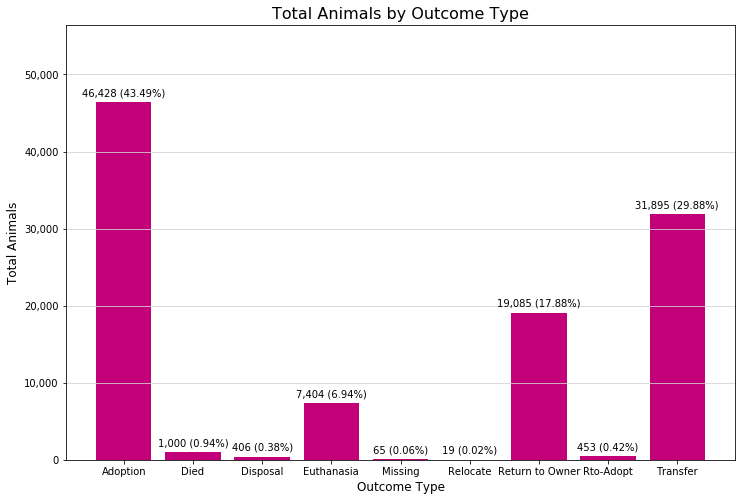

In [18]:
# creat outcome types data series
outcome_types = df_outcomes.groupby(['Outcome Type'])['Animal ID'].count()

#plot the series
fig, ax = plt.subplots(figsize=(12,8))

x_axis = np.arange(len(outcome_types))
# Create a bar chart based upon the above data
plt.bar(x_axis, outcome_types, color=color[4])
# can just send in x axis since it has the vlaues of axis already to be updated
plt.xticks(x_axis, outcome_types.index)

total_outcomes = outcome_types.sum()

index = 0
for p in ax.patches:
    h = p.get_height()
    x = p.get_x()+p.get_width()/2.
    pct = ' (' + str(round(h/total_outcomes * 100, 2)) + '%)'
    amt = format(p.get_height(), ',.0f')
#     print(amt + pct)
    if h != 0:   
        ax.annotate(amt+pct, xy=(x,h), xytext=(0,4), 
                   textcoords="offset points", ha="center", va="bottom")
    index += 1
        
# reset max y axis so we can get the values printed inside the chart
plt.ylim(0, max(outcome_types.values)+10000)
# format y axis with commas
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
# show grid lines on y axis
ax.grid(b=True,which="both",axis="y",linestyle="-",color="lightgrey")

plt.title("Total Animals by Outcome Type", fontsize='16')
plt.xlabel("Outcome Type", fontsize='12')
plt.ylabel("Total Animals", fontsize='12')
plt.savefig('images/outcomes_by_outcome_type.png')
plt.show()

In [19]:
# let's look at outcomes by month 
df_outcomes.groupby(['Outcome Month'])['Animal ID'].count()

Outcome Month
1      7637
2      6882
3      8230
4      8208
5      9998
6     10888
7     11048
8     10206
9      7937
10     9242
11     8135
12     8351
Name: Animal ID, dtype: int64

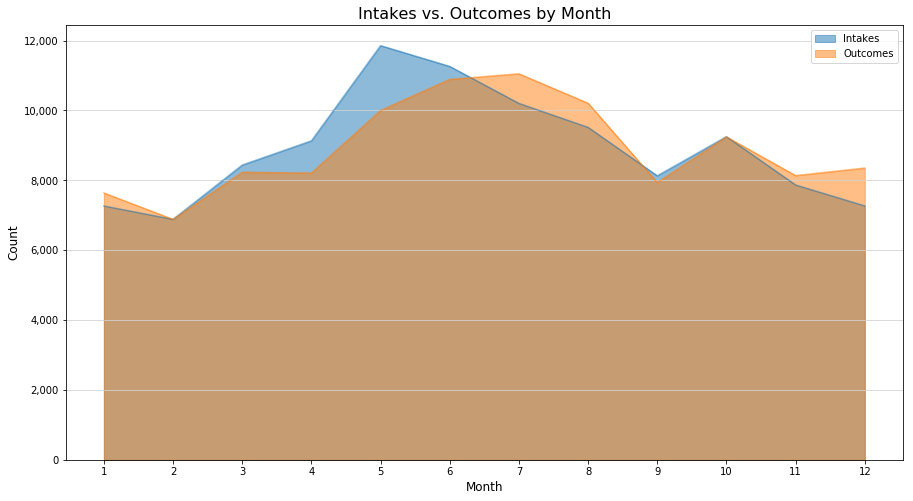

In [22]:
# get total of outcomes by month
intakes_by_month = df_intakes.groupby(['Intake Month'])['Animal ID'].count()
outcomes_by_month = df_outcomes.groupby(['Outcome Month'])['Animal ID'].count()

# combine intakes by month and outcomes by month into a single dataframe
df_monthly_intakes_outcomes = intakes_by_month.to_frame(name = 'Intakes').join(outcomes_by_month.to_frame(name='Outcomes'))
# df_monthly_intakes_outcomes.index

# create an area chart to compare incomes to outcomes
ax = df_monthly_intakes_outcomes.plot.area(stacked=False, figsize=(15,8)) 

plt.title('Intakes vs. Outcomes by Month', fontsize='16')
plt.xlabel('Month', fontsize='12')
plt.ylabel('Count', fontsize='12')

# format y axis with commas
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
# show grid lines on y axis
ax.grid(b=True,which="both",axis="y",linestyle="-",color="lightgrey")
plt.xticks(df_monthly_intakes_outcomes.index)

plt.savefig('images/intakes_vs_outcomes_by_month.png')
plt.show()


## Does age play a factor in how quickly a Cat or Dog is adopted?

In [23]:
df_adoptions = df_combined_deduped.loc[(df_combined_deduped['Outcome Type'] == 'Adoption') & df_combined_deduped['Animal Type'].isin(['Cat', 'Dog'])]
df_adoptions.head()

,Animal ID,Name,DateTime Intake,Found Location,Intake Type,Intake Condition,Animal Type,Age upon Intake,Breed,Color,...,Intake Age in Months,DateTime Outcome,Outcome Type,Outcome Subtype,Age upon Outcome,Outcome Month,Outcome Year,Date Intake,Date Outcome,Days in Center
19,A802984,Little Man,08/25/2019 03:55:00 PM,Austin (TX),Owner Surrender,Normal,Cat,5 months,Domestic Shorthair,Orange Tabby,...,5,08/27/2019 04:16:00 PM,Adoption,NaN,5 months,8,2019,2019-08-25,2019-08-27,2
27,A802963,Coco,08/25/2019 02:03:00 PM,Austin (TX),Owner Surrender,Normal,Dog,8 months,Bichon Frise Mix,White,...,8,08/27/2019 04:32:00 PM,Adoption,NaN,9 months,8,2019,2019-08-25,2019-08-27,2
35,A802880,NaN,08/24/2019 12:00:00 PM,Austin (TX),Owner Surrender,Normal,Cat,2 months,Domestic Shorthair,Blue/White,...,2,08/26/2019 05:43:00 PM,Adoption,NaN,2 months,8,2019,2019-08-24,2019-08-26,2
42,A802847,NaN,08/23/2019 04:22:00 PM,6407 Springdale Road in Austin (TX),Stray,Normal,Dog,1 year,Chihuahua Shorthair,Brown/White,...,12,08/27/2019 04:19:00 PM,Adoption,NaN,1 year,8,2019,2019-08-23,2019-08-27,4
49,A802824,NaN,08/23/2019 12:08:00 PM,Corral Lane And Circle S Road in Austin (TX),Stray,Normal,Dog,5 months,Border Collie Mix,White/Brown,...,5,08/27/2019 07:05:00 PM,Adoption,NaN,5 months,8,2019,2019-08-23,2019-08-27,4


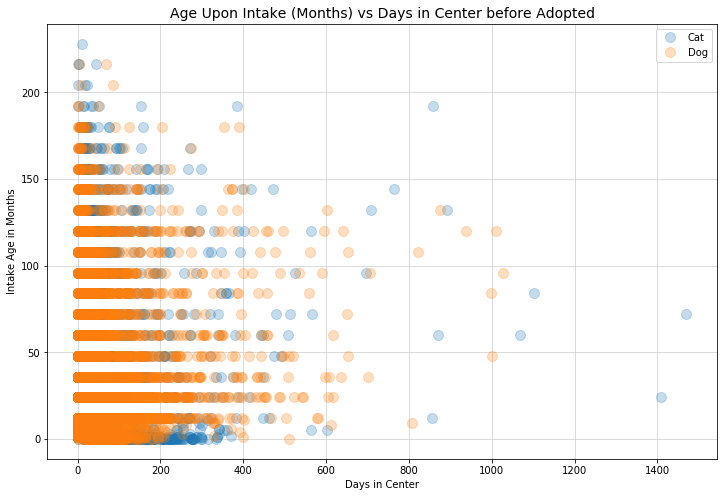

In [28]:
groups = df_adoptions.groupby('Animal Type')

# Plot
fig, ax = plt.subplots(figsize=(12,8))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['Days in Center'], group['Intake Age in Months'], marker='o', linestyle='',  alpha=.25, ms=10, label=name)
ax.legend()

plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.title('Age Upon Intake (Months) vs Days in Center before Adopted', fontsize=14)
plt.xlabel("Days in Center")
plt.ylabel("Intake Age in Months")

plt.savefig('images/adoption_age_vs_time_in_center.png')
plt.show()

In [25]:
# create bins for age ranges
bins = [0, 12, 36, 72, 108, 144, 180, 360]
# Create the names for the four bins
group_names = ["< 1 Year", "1-3 Year", "3-6 Years", "6-9 Years", "9-12 Years", "12-15 Years", "> 15 Years"]

# add these items to the df_adoptions
df_adoptions['Intake Age Range'] = pd.cut(df_adoptions['Intake Age in Months'], bins, labels=group_names)
df_adoptions.head()

/Users/amy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Animal ID,Name,DateTime Intake,Found Location,Intake Type,Intake Condition,Animal Type,Age upon Intake,Breed,Color,...,DateTime Outcome,Outcome Type,Outcome Subtype,Age upon Outcome,Outcome Month,Outcome Year,Date Intake,Date Outcome,Days in Center,Intake Age Range
19,A802984,Little Man,08/25/2019 03:55:00 PM,Austin (TX),Owner Surrender,Normal,Cat,5 months,Domestic Shorthair,Orange Tabby,...,08/27/2019 04:16:00 PM,Adoption,NaN,5 months,8,2019,2019-08-25,2019-08-27,2,< 1 Year
27,A802963,Coco,08/25/2019 02:03:00 PM,Austin (TX),Owner Surrender,Normal,Dog,8 months,Bichon Frise Mix,White,...,08/27/2019 04:32:00 PM,Adoption,NaN,9 months,8,2019,2019-08-25,2019-08-27,2,< 1 Year
35,A802880,NaN,08/24/2019 12:00:00 PM,Austin (TX),Owner Surrender,Normal,Cat,2 months,Domestic Shorthair,Blue/White,...,08/26/2019 05:43:00 PM,Adoption,NaN,2 months,8,2019,2019-08-24,2019-08-26,2,< 1 Year
42,A802847,NaN,08/23/2019 04:22:00 PM,6407 Springdale Road in Austin (TX),Stray,Normal,Dog,1 year,Chihuahua Shorthair,Brown/White,...,08/27/2019 04:19:00 PM,Adoption,NaN,1 year,8,2019,2019-08-23,2019-08-27,4,< 1 Year
49,A802824,NaN,08/23/2019 12:08:00 PM,Corral Lane And Circle S Road in Austin (TX),Stray,Normal,Dog,5 months,Border Collie Mix,White/Brown,...,08/27/2019 07:05:00 PM,Adoption,NaN,5 months,8,2019,2019-08-23,2019-08-27,4,< 1 Year


In [42]:
df_adoption_age_ranges = df_adoptions.groupby(['Animal Type', 'Intake Age Range'])['Days in Center'].mean().reset_index()

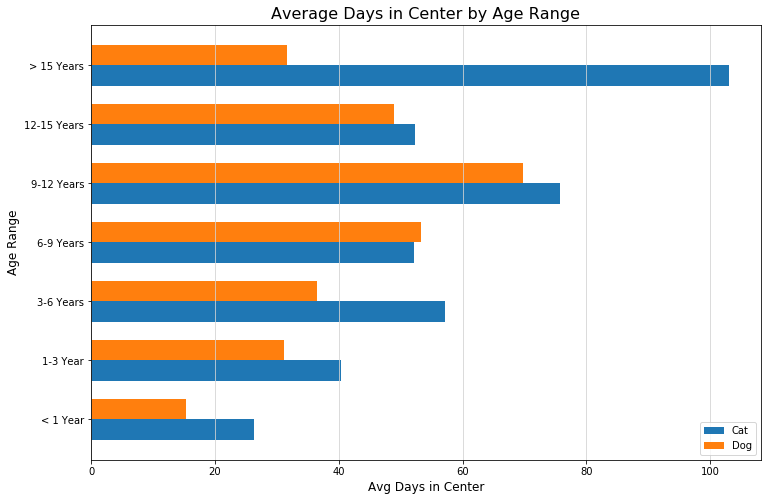

In [47]:
x_axis = df_adoption_age_ranges[df_adoption_age_ranges['Animal Type'] == 'Cat']['Intake Age Range']
cats_data = df_adoption_age_ranges[df_adoption_age_ranges['Animal Type'] == 'Cat']['Days in Center']
dogs_data = df_adoption_age_ranges[df_adoption_age_ranges['Animal Type'] == 'Dog']['Days in Center']

ind = np.arange(len(x_axis))  # the x locations for the groups

#plot hbar chart
fig, ax = plt.subplots(figsize=(12,8))
width = .35
rects = ax.barh(ind - width/2, cats_data, width, label='Cat')

rects2 = ax.barh(ind + width/2, dogs_data, width, label='Dog')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Age Range', fontsize=12)
ax.set_xlabel('Avg Days in Center', fontsize=12)
ax.set_title('Average Days in Center by Age Range', fontsize=16)
ax.set_yticks(ind)
ax.set_yticklabels(x_axis)

# show grid lines on y axis
ax.grid(b=True,which="both",axis="x",linestyle="-",color="lightgray")
ax.legend(loc='lower right')

plt.savefig('images/avg_days_by_age_range.png')
plt.show()